# Assignment 1 
##### Created by s181487 and s206759

## Assignment 1.1: Exploring WS and BA models


#### Part 1
> *Exercises*: Did you really read the text? Answer the following questions (no calculations needed) in your IPython notebook. 
> 
> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?
>
> A network with real data with $\langle k \rangle$ contains both nodes with 
> The significant deviation between the data and the Poisson fit indicates that the random network model underestimates the size and the frequency of the high degree nodes, as well as the number of low degree nodes. Instead the random network model predicts a larger number of nodes in the vicinity of ‹k› than seen in real networks.
> 
> * List the four regimes that characterize random networks as a function of $\langle k \rangle$.
> 
> The four topologically distinct regimes are
> - Subcritical Regime, where $0 < \langle k \rangle < 1$
> since $0 < \langle k \rangle$ we know we have edges in our network hower since $\langle k \rangle <1$ we also know that we don't have a lot of edges, meaning that the network contains small clusters, with non of them being a dominant cluster. Here it also goes that $p < 1/N$ 
>
> - Critical Point, where $\langle k \rangle = 1$. The Critical Point as the name describe is the point that distinguishes the networks that only has small clusters from the ones that has on large component that dominant everything. So in this regime we have numerous small components compared to the Subcritical Regime. The network mainly contains trees, meaning there are no cycles. Here $p = 1/N$
> 
> Subcritical Regime, Critical Point, Supercritical Regime and Connected Regime
> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks) that the degree-dependent clustering $C(k)$ decreases as a function of $k$ in real-world networks?
>
> In contrast, for real networks ‹C› appears to be independent of N.

> *Exercises*: WS edition.
> 
> * First, let's use `networkx` to play around with WS graphs. Use `nx.watts_strogatz_graph` to generate 3 graphs with 500 nodes each, average degree = 4, and rewiring probablity $p = 0, 0.1,$ and  $1$. Calculate the average shortest path length $\langle d \rangle$ for each one. 
> * Describe what happens to the network when $p = 1$.
> * Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.
> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).
> * Imagine that you put this plot in an assignment. Write a figure caption that explains to the reader what the plot shows (which variables, etc) and what's interesting about it.

The Watts-strogatz model is an extension to the random network model, that better captures the small-world properties of many real networks compared to a simple random network with the same amount of nodes and links. The WS-network does this by initially connecting each node to its K nearest neighbours, giving it high initial clustering. Each edge is then with a probability p assigned to a random node in the graph. This immitates the nature of a lot of real networks such as facebook friends graph, where most of your friends are also friends with eachother ( giving high clustering coefficients), but your buddy Peter might have a friend in Australia (the random rewiring of an edge),which gives a shorter path from you to someone in Australia. 

We will experiment with different values of p to see how it affects the average shortest path of a WS-network below.

In [8]:
import networkx as nx
N = 500
graph_0 = nx.watts_strogatz_graph(n = N, k = 4, p = 0)
graph_01 = nx.watts_strogatz_graph(n = N, k = 4, p = 0.1)
graph_1 = nx.watts_strogatz_graph(n = N, k = 4, p = 1)

# Calculate the average shortest path length ⟨d⟩ for each one.
avg_path_length_0 = nx.average_shortest_path_length(graph_0)
avg_path_length_01 = nx.average_shortest_path_length(graph_01)
avg_path_length_1 = nx.average_shortest_path_length(graph_1)

print(f"Average shortest path length for p=0: {avg_path_length_0}")
print(f"Average shortest path length for p=0.1: {avg_path_length_01}")
print(f"Average shortest path length for p=1: {avg_path_length_1}")


Average shortest path length for p=0: 62.875751503006015
Average shortest path length for p=0.1: 7.63677755511022
Average shortest path length for p=1: 4.75498997995992


As can be seen above as P increases the average shortest path decreases. When p=0 none of the nodes are reconnected and the network is a regular lattice, with high clustering. When p is increased to 0.1, then some of the edges are rewired, meaning that the network still has a high clustering but the average shortest path is drastically reduced, displaying the small-world property where a few cross-graph connections makes everything a lot closer. When p=1, every edge is rewired, making the graph completely random. This is illustrated in image 3.14 from the book.

* Generate a lot of networks with different values of $p$. You will notice that paths are short when $p$ is close to one and they are long when $p = 0$. What's the value of $p$ for which the average shortest path length gets close to the short paths we find in a fully randomized network.

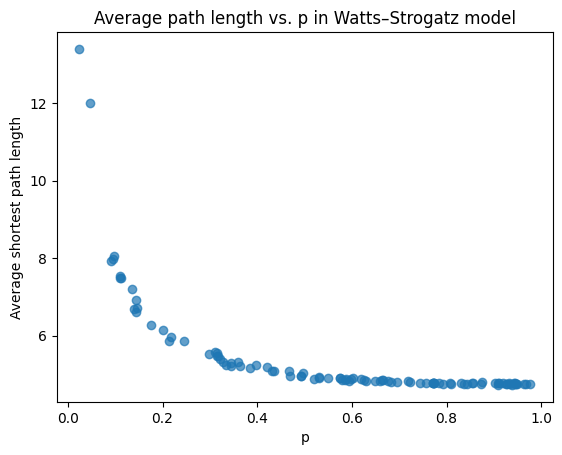

In [9]:
import random
import matplotlib.pyplot as plt

ps = [random.random() for _ in range(100)]
pls = []
for p in ps:
    graph = nx.watts_strogatz_graph(n = N, k = 4, p = p)
    avg_path_length = nx.average_shortest_path_length(graph)
    pls.append(avg_path_length)


plt.scatter(ps, pls, alpha=0.7)
plt.xlabel("p")
plt.ylabel("Average shortest path length")
plt.title("Average path length vs. p in Watts–Strogatz model")
plt.show()

We have generated 100 networks with a random p betweeen 0 and 1. The plot above shows the average shortest path for each network plotted against their p value. It can clearly be seen that the average shortest path length decreases exponentially with p. Until it flattens towards p=1, which is a fully random network. In this case the fully random network has an average shortest path of approximately 5 steps. We can see that p > 0.2 has close to the same average path. 

> * Let's investigate this behavior in detail. Generate 50 networks with $N = 500$, $\langle k \rangle = 4$, for each of $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. Calculate the average of $\langle d \rangle$ as well as the standard deviation over the 50 networks, to create a plot that shows how the path length decreases very quickly with only a little fraction of re-wiring. Use the standard deviation to add [errorbars](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) to the plot. My version of the plot is below (since a picture's worth 1000 words).

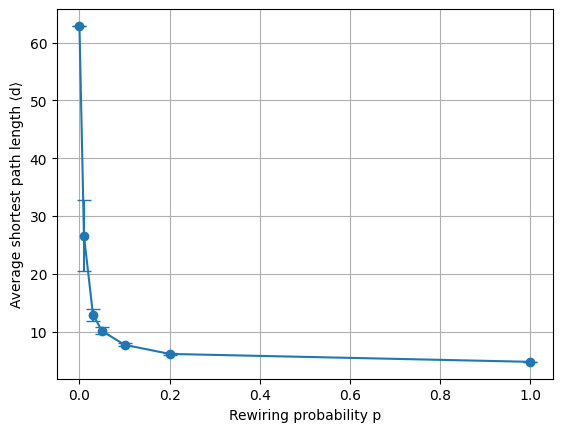

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 500
k = 4
ps = [0, 0.01, 0.03, 0.05, 0.1, 0.2, 1.0]
num_graphs = 50

avg_d_means = []
avg_d_stds = []

# Compute average shortest path lengths
for p in ps:
    path_lengths = []
    for _ in range(num_graphs):
        G = nx.watts_strogatz_graph(n, k, p)
        d = nx.average_shortest_path_length(G)
        path_lengths.append(d)
    avg_d_means.append(np.mean(path_lengths))
    avg_d_stds.append(np.std(path_lengths))

# Plot results
plt.errorbar(ps, avg_d_means, yerr=avg_d_stds, fmt="o-", capsize=5)
plt.xlabel("Rewiring probability p")
plt.ylabel("Average shortest path length ⟨d⟩")
plt.grid(True)
plt.show()

Figure: Average shortest path length \<d> with standard deviations as error bars for 50 watts-strogatz networks with N = 500 and the amount of nearest neighbours \<k> = 4, for each of the following p-values $p = \{0, 0.01, 0.03, 0.05, 0.1, 0.2\}$. The plot shows that even a small amount of rewiring drastically reduces the average shortest path, highlighting . It also shows that the standard deviation decreases with a higher p, meaning that the difference in average shortest path between the networks is lower for the networks with a higher p, which makes sense as increased randomness in the network is bound to increase the global connectedness of it.

# rock music graph #

In [ ]:
import pickle

